# Exploratory Data Analysis and Basic Imputation of Missing Values

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


# Data Exploration

In [2]:
# import dataset

hp_w_outcome = pd.read_csv('../train.csv')
hp_w_outcome.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# separate SalePrice column as that is the target

hp_saleprice = hp_w_outcome[['SalePrice']]

hp = hp_w_outcome.drop(['SalePrice'], axis=1)
hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Un

In [4]:
hp_saleprice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [5]:
hp.info()

# [LotFrontage, Alley, MasVnrType, MasVnrArea]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


# Combining Features using some insight from the following links:

- https://www.homelight.com/blog/what-makes-property-value-increase/
- https://www.homelight.com/blog/what-upgrades-increase-home-value/

In [8]:
# adding the number of bathrooms
hp['TotalBaths'] = hp['FullBath'] + hp['HalfBath'] * 0.5

# adding the number of bathrooms in the basement
hp['BsmtBaths'] = hp['BsmtFullBath'] + hp['BsmtHalfBath'] * 0.5

# adding the total number of finished SF of the basement
hp['BsmtFinTotalSF'] = hp['BsmtFinSF1'] + hp['BsmtFinSF2']

# determining if there is unfinished SF in the basement
hp['BsmtUnfin'] = [1 if x > 0 else 0 for x in hp['BsmtUnfSF']]

# determining if a house has a 2nd floor
hp['2ndFlr'] = [1 if x > 0 else 0 for x in hp['2ndFlrSF']]

# determining if a house has any low quality finishes
hp['LowQualFin'] = [1 if x > 0 else 0 for x in hp['LowQualFinSF']]

In [9]:
# https://www.fixr.com/comparisons/porch-vs-deck#cQ
    # decks are diff than porches, but it seems that porches can be grouped

# adding the total SF of porches
hp['TotalPorchSF'] = hp['OpenPorchSF'] + hp['EnclosedPorch'] + hp['3SsnPorch'] + hp['ScreenPorch']

# determining if there are any porches at all
hp['Porches'] = [1 if x > 0 else 0 for x in hp['TotalPorchSF']]

# determining if there are any decks at all
hp['Decks'] = [1 if x > 0 else 0 for x in hp['WoodDeckSF']]

In [10]:
# calculating the time between remodeling and selling the house
hp['YrsRemodToSold'] = hp['YrSold'] - hp['YearRemodAdd']

In [11]:
# dropping some columns to save space
hp_myversion = hp.drop(['BsmtFinSF1',
                        'BsmtFinSF2',
                        'OpenPorchSF',
                        'EnclosedPorch',
                        '3SsnPorch',
                        'LowQualFinSF',
                        'WoodDeckSF'], axis=1)

# Visuals of the SalePrice Distribution

<AxesSubplot:>

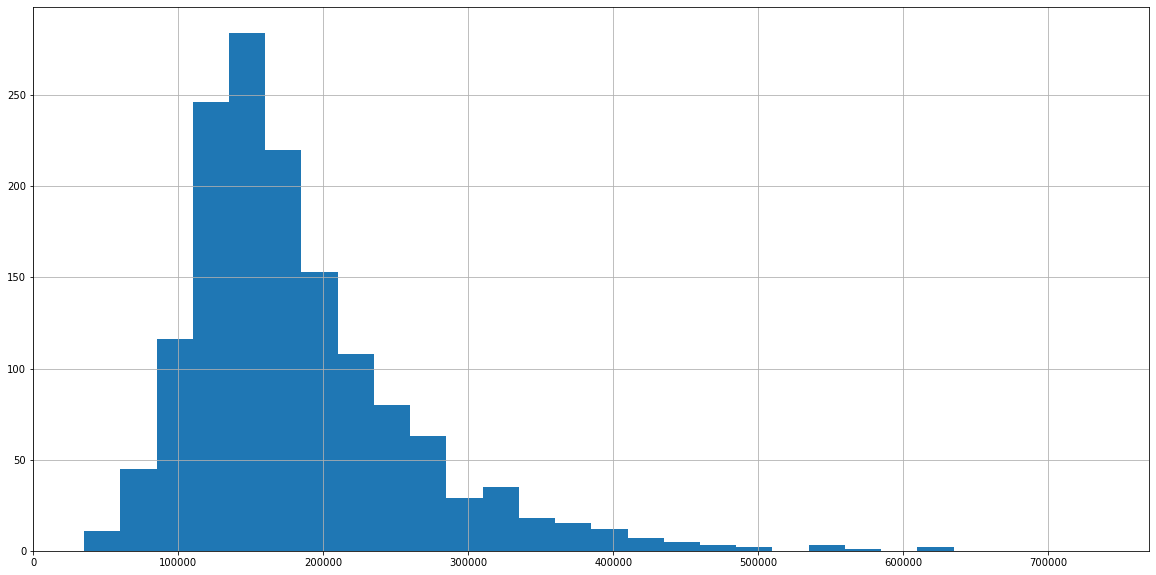

In [12]:
# histogram of SalePrice Distribution

hp_saleprice['SalePrice'].hist(bins=range(min(hp_saleprice['SalePrice']), 
                                          max(hp_saleprice['SalePrice']) + 1, 25000),
                               figsize=(20,10))

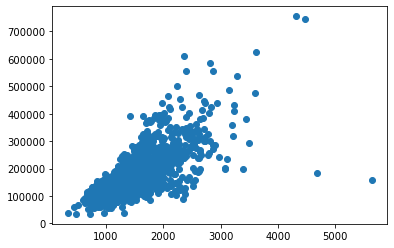

In [13]:
# Scatterplot of SalePrice against General Living Area

plt.scatter(y=hp_saleprice['SalePrice'], x=hp.GrLivArea)
    # we see fanning here

In [14]:
# converting SalePrice using log in order to remove right tail

hp_logsaleprice = pd.DataFrame(np.log(hp_saleprice))
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

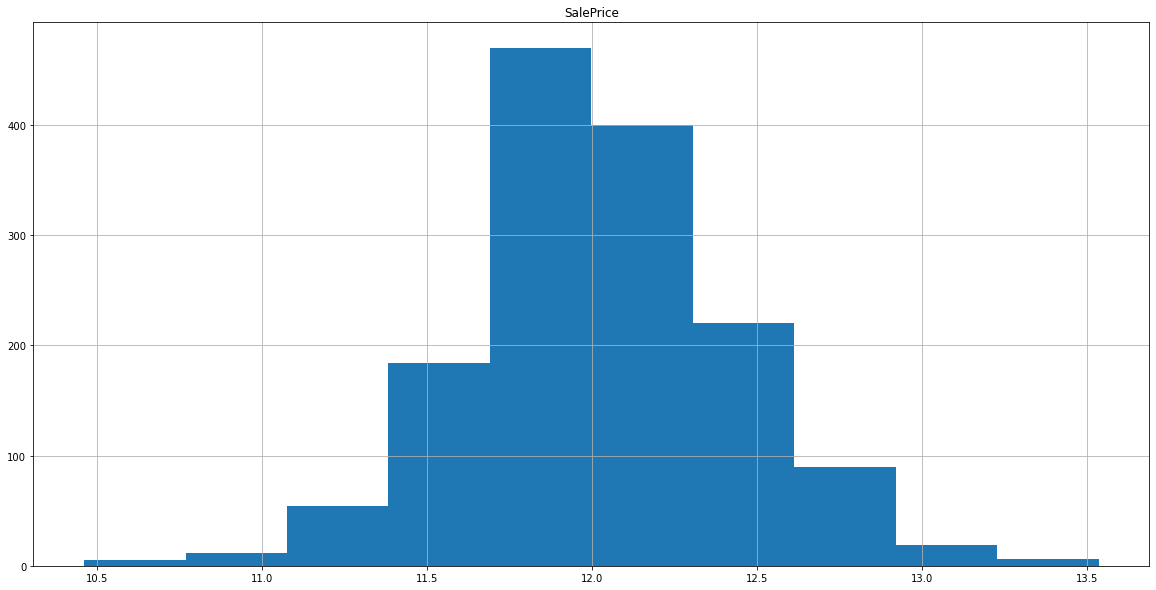

In [15]:
# histogram of the resulting log transformation
hp_logsaleprice.hist(figsize=(20,10))

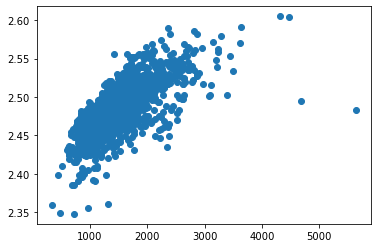

In [16]:
# Scatterplot of the log of SalePrice against General Living Area

plt.scatter(y=np.log(hp_logsaleprice['SalePrice']), x=hp.GrLivArea)

## Use Functions from Self_Written_Functions_Sheet to Get Columns with Null Values

## Split Column Names into dtype Object or Numeric

In [17]:
# columns that have dtype=='object' vs not

cols_obj = []
cols_num = []

# Creates list of column names with dtype=='object' and one where dtype!='object'
col_obj_list(hp, hp.columns, cols_obj, cols_num)

# columns that have dtype=='object'

cols_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
# columns that do NOT have dtype=='object'

cols_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalBaths',
 'BsmtBaths',
 'BsmtFinTotalSF',
 'BsmtUnfin',
 '2ndFlr',
 'LowQualFin',
 'TotalPorchSF',
 'Porches',
 'Decks',
 'YrsRemodToSold']

## Get Columns with Null Values

In [19]:
# columns with object dtype that have null values
    # to use with list_nan_col
cols_w_nan_obj = []

# Outputs a list of the columns that have null values
nan_col_list(hp, cols_obj, cols_w_nan_obj)

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [20]:
# columns with non-object dtype that have null values

cols_w_nan_num = []

# Outputs a list of the columns that have null values
nan_col_list(hp, cols_num, cols_w_nan_num)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
np.sum(hp['Alley'].isna())

1369

# Explore Null Values of the Columns

## Find Unique Values of Columns of Object dtype Excluding NaNs

In [22]:
data_dict_obj = {}
data_dict_null_obj = {}
cols_nan_unique(hp, cols_w_nan_obj, data_dict_obj, data_dict_null_obj)

# to visualize via dataframes the unique values that exist in the dataset
# to visualize the null count next to those values

data_dict_obj_df = pd.DataFrame.from_dict(data_dict_obj, orient='index').fillna('')
data_dict_null_obj_df = pd.DataFrame(data_dict_null_obj.items())
data_dict_null_obj_df.columns = ['Col_Name', 'Null_Count']
data_dict_null_obj_df = data_dict_null_obj_df.set_index('Col_Name')
data_dict_null_obj_df

,Null_Count
Col_Name,
Alley,1369
MasVnrType,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


In [23]:
data_dict_obj_df

,0,1,2,3,4,5
Alley,Grvl,Pave,,,,
MasVnrType,BrkFace,None,Stone,BrkCmn,,
BsmtQual,Gd,TA,Ex,Fa,,
BsmtCond,TA,Gd,Fa,Po,,
BsmtExposure,No,Gd,Mn,Av,,
BsmtFinType1,GLQ,ALQ,Unf,Rec,BLQ,LwQ
BsmtFinType2,Unf,BLQ,ALQ,Rec,LwQ,GLQ
Electrical,SBrkr,FuseF,FuseA,FuseP,Mix,
FireplaceQu,TA,Gd,Fa,Ex,Po,
GarageType,Attchd,Detchd,BuiltIn,CarPort,Basment,2Types


In [24]:
pd.concat([data_dict_obj_df, data_dict_null_obj_df], axis=1)

,0,1,2,3,4,5,Null_Count
Alley,Grvl,Pave,,,,,1369
MasVnrType,BrkFace,None,Stone,BrkCmn,,,8
BsmtQual,Gd,TA,Ex,Fa,,,37
BsmtCond,TA,Gd,Fa,Po,,,37
BsmtExposure,No,Gd,Mn,Av,,,38
BsmtFinType1,GLQ,ALQ,Unf,Rec,BLQ,LwQ,37
BsmtFinType2,Unf,BLQ,ALQ,Rec,LwQ,GLQ,38
Electrical,SBrkr,FuseF,FuseA,FuseP,Mix,,1
FireplaceQu,TA,Gd,Fa,Ex,Po,,690
GarageType,Attchd,Detchd,BuiltIn,CarPort,Basment,2Types,81


In [25]:
hp[hp['MasVnrType']=='None']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.0,0.5,978,1,0,0,0,0,1,31
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1.0,1.0,216,1,1,0,307,1,0,36
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,1.5,1.0,732,1,1,0,350,1,1,14
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,2.0,0.0,0,1,1,0,205,1,1,58
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,1.0,1.0,851,1,0,0,4,1,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,2.0,1.0,410,1,0,0,113,1,0,4
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.5,0.0,0,1,1,0,40,1,0,7
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,

### Columns with dtype Object that have 'None' but also have NaNs

- MasnVnrType

### Will use alternative to 'No' or 'None' as those are used in the data:

- Will use 'DNE'

## Replace Appropriate Columns' NaNs with 'DNE'

### Columns with dtype Object that should NOT have NaNs:

In [26]:
should_not_have_nan_obj = ['MasVnrType', 'Electrical']

### Columns with dtype non-Object that should NOT have NaNs:

In [27]:
should_not_have_nan_num = ['LotFrontage', 'MasVnrArea']

In [28]:
obj_DNE_list = [i for i in cols_w_nan_obj if i not in should_not_have_nan_obj]

In [29]:
num_DNE_list = [i for i in cols_w_nan_num if i not in should_not_have_nan_num]

In [30]:
# from Self_Written_Functions_Sheet_Recover
    # Inputs DNE or 0 for null values based on column's data type
nan_col_obj_list_fillna(hp, obj_DNE_list)

In [31]:
# from Self_Written_Functions_Sheet_Recover
    # Inputs DNE or 0 for null values based on column's data type
nan_col_obj_list_fillna(hp, num_DNE_list)

### Check if There Are Any NaNs Remaining

In [32]:
# outputs columns that contain NaNs
cols_w_nan_obj2 = []

nan_col_list(hp, cols_w_nan_obj, cols_w_nan_obj2)

['MasVnrType', 'Electrical']

In [33]:
# outputs columns that contain NaNs
cols_w_nan_num2 = []

nan_col_list(hp, cols_w_nan_num, cols_w_nan_num2)

['LotFrontage', 'MasVnrArea']

In [34]:
cols_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Filling values for Electrical with mode since there is only 1 value missing

In [35]:
hp['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [36]:
hp[hp['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
1379,1380,80,RL,73.0,9735,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,DNE,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,DNE,DNE,DNE,0,5,2008,WD,Normal,2.5,0.0,0,1,1,0,0,0,1,1


In [37]:
hp['Electrical'].mode()

0    SBrkr
dtype: object

In [38]:
# filling the missing value with the mode
hp['Electrical'].fillna(hp['Electrical'].mode()[0], inplace=True)
hp[hp['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold


## Find Unique Values of Columns of Non-Object dtype Excluding NaNs

In [39]:
data_dict_num = {}
data_dict_null_num = {}

# From Self_Written_Functions_Sheet_Recover
# Creates 2 dictionaries:
#     1st: contains unique values of the column
#     2nd: contains the null count
cols_nan_unique(hp, cols_w_nan_num, data_dict_num, data_dict_null_num)

# creating a dataframe from the dictionaries
data_dict_null_num_df = pd.DataFrame(data_dict_null_num.items())
data_dict_null_num_df.columns = ['Col_Name', 'Null_Count']
data_dict_null_num_df = data_dict_null_num_df.set_index('Col_Name')
data_dict_null_num_df

,Null_Count
Col_Name,
LotFrontage,259
MasVnrArea,8
GarageYrBlt,0


# Find and fill NaNs and like-NaNs

#### LotFrontage

In [40]:
np.sum(hp[hp['LotFrontage']==0]['LotFrontage'])

0.0

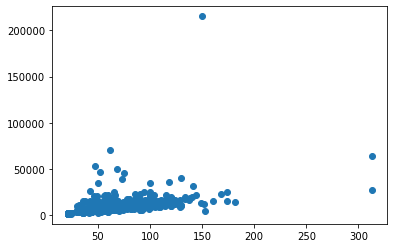

In [41]:
# check for patterns in the graph
plt.scatter(x=hp['LotFrontage'], y=hp['LotArea'])

#### MasVnrArea

In [42]:
np.sum(hp[hp['MasVnrArea']==0]['MasVnrArea'])

0.0

<AxesSubplot:>

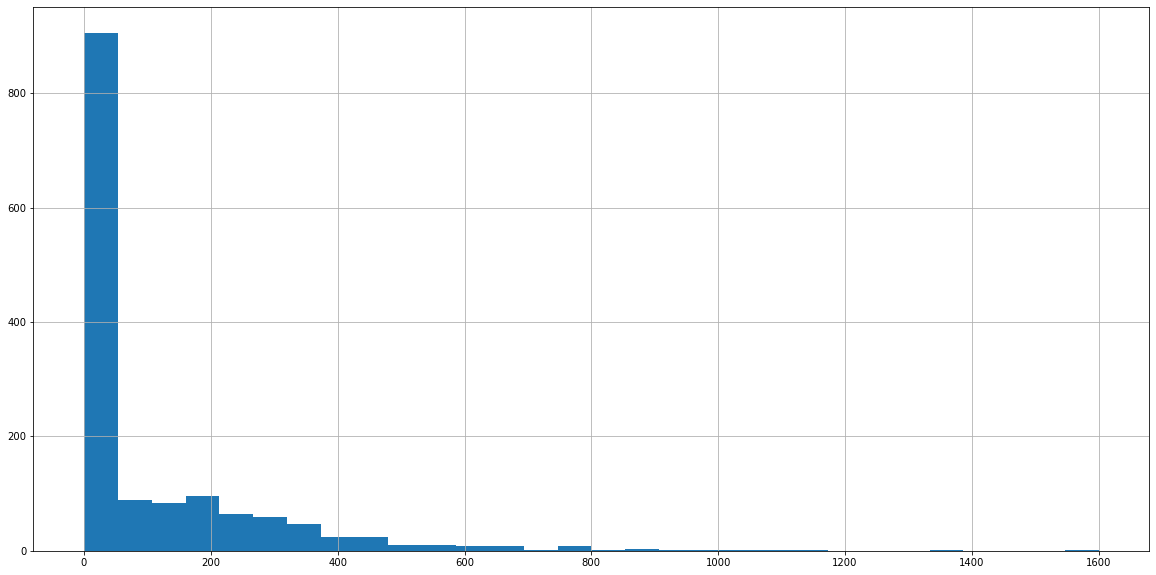

In [43]:
# safer to assume that there is none (0)

hp['MasVnrArea'].hist(bins=30, figsize=(20,10))

In [44]:
np.sum(hp['MasVnrArea'].isna())

8

In [45]:
hp.loc[hp.MasVnrArea.isna(), 'MasVnrArea'] = 0
hp[hp['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold


In [46]:
np.sum(hp['MasVnrArea'].isna())

0

### Check MasVnrArea for any NaNs

In [47]:
np.sum(hp['MasVnrType'].isna())

8

#### Cross-Check MasVnrType and MasVnrArea for NaNs

In [48]:
hp[hp['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0


In [49]:
# converting the masvnrtype to 'None' if NaN
hp.loc[(hp.MasVnrType.isna()) & (hp.MasVnrArea==0), 'MasVnrType']='None'

In [50]:
hp[hp['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


#### Check for discrepancies between Type and Area

In [51]:
# Will use mode of MasVnrType if MasVnrArea is > 1

# Check if replacement of 'None' has held
hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


In [52]:
# Will assume MasVnrArea of 1 are actually 0 based on previous cell

hp.loc[hp.MasVnrArea==1, 'MasVnrArea'] = 0

In [53]:
hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
1300,None,344.0
1334,None,312.0


### Checking visuals of the breakdowns for each MasVnrType

In [54]:
hp['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:>

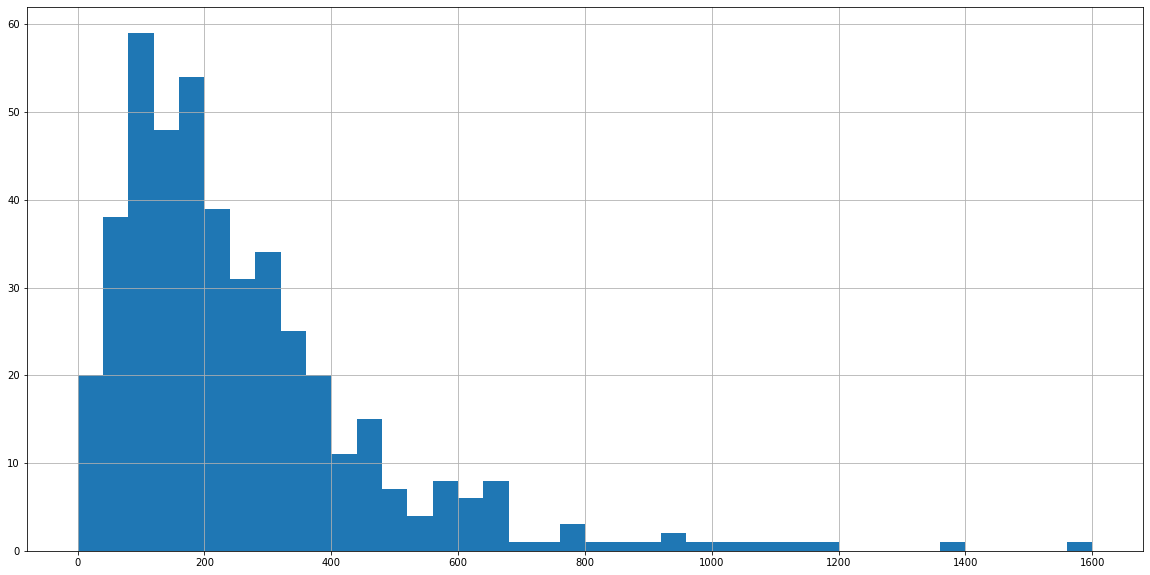

In [55]:
hp[hp['MasVnrType']=='BrkFace']['MasVnrArea'].hist(bins=40, figsize=(20,10))

<AxesSubplot:>

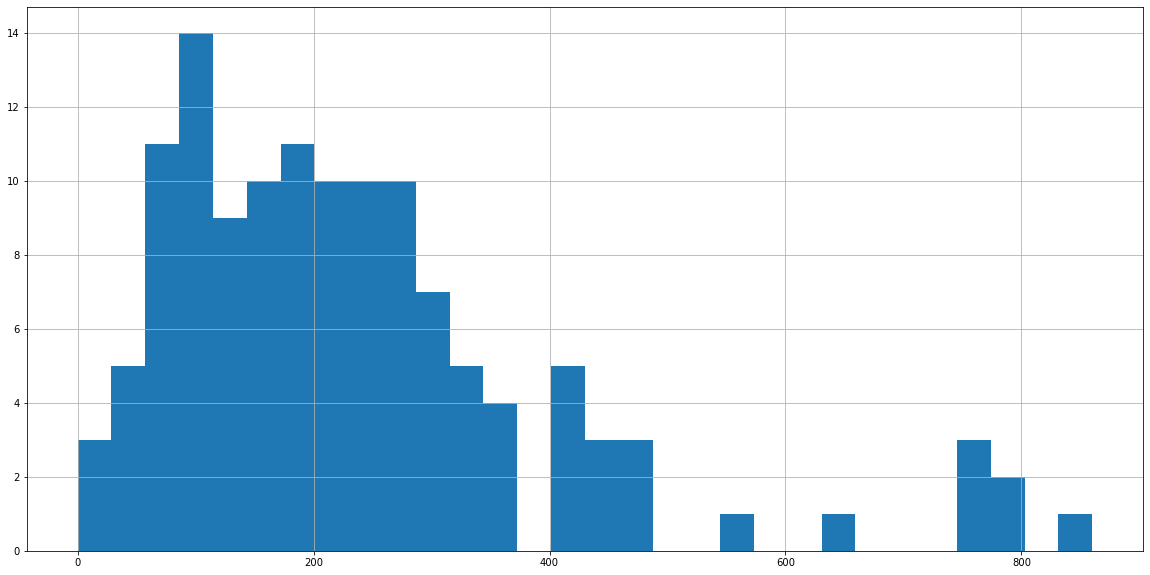

In [56]:
hp[hp['MasVnrType']=='Stone']['MasVnrArea'].hist(bins=30, figsize=(20,10))

<AxesSubplot:>

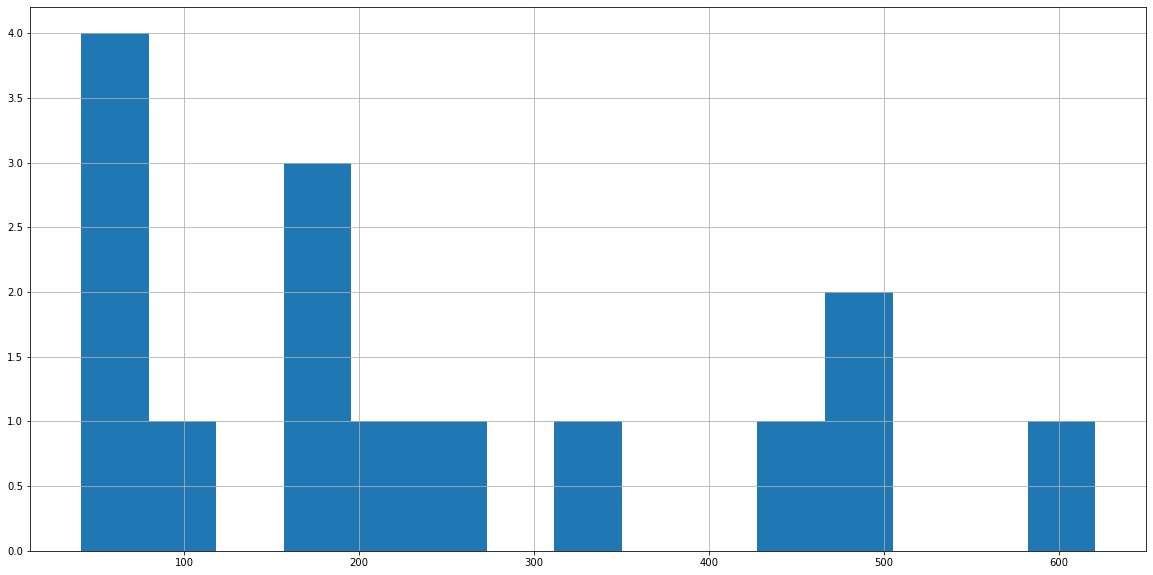

In [57]:
hp[hp['MasVnrType']=='BrkCmn']['MasVnrArea'].hist(bins=15, figsize=(20,10))

#### Based on the Graphs above, we can see that BrkFace has the highest count

In [58]:
# ['MasVnrType'] should = the mode of the ['MasVnrType'] that is NOT None

from collections import Counter

masvnrtype_mode = [x[0] for x in Counter(list(hp['MasVnrType'])).most_common()]
    # outputs something that looks like: ['None', 'BrkFace', 'Stone', 'BrkCmn']

if masvnrtype_mode[0]=='None':
    hp.loc[(hp.MasVnrArea > 1) & (hp.MasVnrType == 'None'), 'MasVnrType'] = masvnrtype_mode[1]
else:
    hp.loc[(hp.MasVnrArea > 1) & (hp.MasVnrType == 'None'), 'MasVnrType'] = masvnrtype_mode[0]

In [59]:
hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

# we have successfully converted MasVnrType of 'None' to the most common VnrType that is NOT 'None' as long as the
# MasVnrArea is greater than 0

,MasVnrType,MasVnrArea


#### Checking the specific rows to see if the above was properly implemented

In [60]:
hp.loc[624, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      288.0
Name: 624, dtype: object

In [61]:
hp.loc[1300, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      344.0
Name: 1300, dtype: object

In [62]:
hp.loc[1334, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      312.0
Name: 1334, dtype: object

In [63]:
hp['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [64]:
# Here we see that there are 2 times when MasVnrArea is 0, there is a Type recorded

# maybe use mean or mode of MasVnrArea for each of the MasVnrType?

hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea']==0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [65]:
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mean())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].median())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mode())

259.38169642857144
203.5
0    120.0
1    180.0
dtype: float64


#### Replace values in MasVnrArea that have a Type, but are == 0

- use Mode

In [66]:
# getting the list that contain the prerequisites
mvt_list = set(list(hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea']==0)]['MasVnrType']))

# from Self_Written_Functions_Sheet_Recover
    # The function replaces the 0 in the 'MasVnrArea' to the mode
    # of the 'MasVnrArea' based on the corresponding 'MasVnrType'
fill_masvnrtype(hp, mvt_list)

# the 2nd object printed is the average mode

[0, 1]
150.0


In [67]:
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mean())
print('\n')
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].median())
print('\n')
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mode())

259.71651785714283


203.5


0    120.0
1    180.0
dtype: float64


In [68]:
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].mean())
print('\n')
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].median())
print('\n')
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].mode())

240.234375


206.5


0     50.0
1     72.0
2    100.0
3    106.0
4    186.0
5    200.0
dtype: float64


In [69]:
hp[(hp['MasVnrType'].isna()) & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


In [70]:
hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea'].isna())][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


In [71]:
np.sum(hp[hp['GarageYrBlt']==0]['GarageYrBlt'])

# https://www.redfin.com/news/does-a-garage-add-value-to-a-home/

# according to the above, having a garage does not seem to impact houses in the midwest
# (besides in Chicago) and will be left at 0

0.0

## Replace Appropriate Columns' NaNs with 'DNE'

In [72]:
obj_DNE_list = [i for i in cols_w_nan_obj if i not in should_not_have_nan_obj]

In [73]:
num_DNE_list = [i for i in cols_w_nan_num if i not in should_not_have_nan_num]

In [74]:
nan_col_obj_list_fillna(hp, obj_DNE_list)

In [75]:
nan_col_obj_list_fillna(hp, num_DNE_list)

### Check if There Are Any NaNs Remaining

In [76]:
cols_w_nan_obj2 = []

nan_col_list(hp, cols_w_nan_obj, cols_w_nan_obj2)

[]

In [77]:
cols_w_nan_num2 = []

nan_col_list(hp, cols_w_nan_num, cols_w_nan_num2)

['LotFrontage']

In [78]:
%store hp
%store hp_myversion
%store hp_saleprice
%store hp_logsaleprice

Stored 'hp' (DataFrame)
Stored 'hp_myversion' (DataFrame)
Stored 'hp_saleprice' (DataFrame)
Stored 'hp_logsaleprice' (DataFrame)
